In [1]:
import sys
sys.path.append('../../raNNdom')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - 4 * np.pi ** 2 * tf.sin(np.pi * x) * tf.cos(np.pi * x)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return np.sin(np.pi * x) * np.cos(np.pi * x)

geom = dde.geometry.Interval(-2, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

Compiling model...
'compile' took 0.000366 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.30e+03, 2.33e-01]    [3.49e+03, 2.33e-01]    [4.72e+00]    
1000      [1.01e+01, 1.26e-01]    [5.04e+00, 1.26e-01]    [4.36e-01]    
2000      [5.44e-01, 4.23e-02]    [4.36e-01, 4.23e-02]    [2.55e-01]    
3000      [1.02e-01, 9.26e-05]    [1.05e-01, 9.26e-05]    [2.53e-02]    
4000      [9.68e-02, 2.89e-05]    [9.06e-02, 2.89e-05]    [1.55e-02]    
5000      [9.23e-02, 2.92e-05]    [8.62e-02, 2.92e-05]    [1.52e-02]    
6000      [8.53e-02, 2.69e-05]    [7.95e-02, 2.69e-05]    [1.48e-02]    
7000      [7.49e-02, 2.36e-05]    [6.96e-02, 2.36e-05]    [1.44e-02]    
8000      [6.05e-02, 1.90e-05]    [5.59e-02, 1.90e-05]    [1.39e-02]    
9000      [4.26e-02, 1.34e-05]    [3.90e-02, 1.34e-05]    [1.39e-02]    
10000     [2.42e-02, 7.46e-06]    [2.18e-02, 7.46e-06]    [1.48e-02]    

Best model at step 10000:
  train loss: 2.42e-02
  test lo

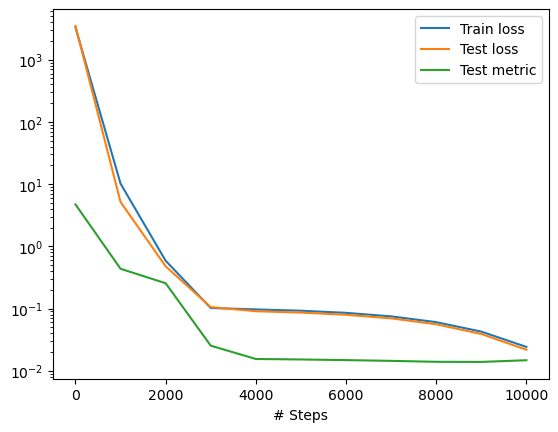

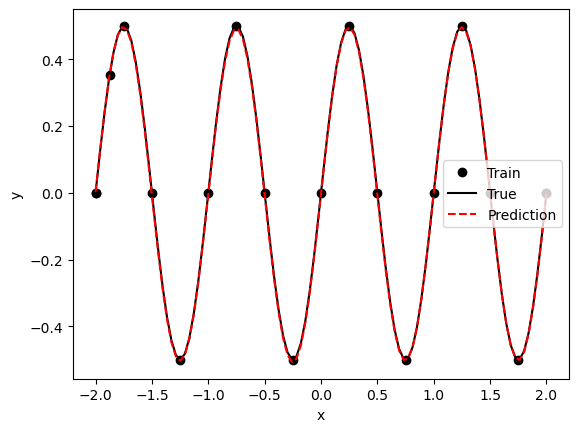

In [3]:
M =20
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R/1000)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [25]:
R = 10
MM = [10, 20, 50, 100, 150, 200, 300]
loss = {}
epochs = {}
metric = {}
for M in MM:
    ll = []
    layer_size = [1] + [M]  +  [1]

    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R/1000)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])

    losshistory, train_state = model.train(iterations=10000)
    
    loss_test = losshistory.loss_test
    epochs[M] = losshistory.steps
    metric[M] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[M] = ll

Compiling model...
'compile' took 0.000381 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [5.09e+03, 9.73e-01]    [4.85e+03, 9.73e-01]    [3.09e+00]    
1000      [2.03e+01, 1.51e-01]    [1.58e+01, 1.51e-01]    [6.76e-01]    
2000      [4.70e+00, 6.87e-02]    [5.43e+00, 6.87e-02]    [5.51e-01]    
3000      [4.04e+00, 1.02e-01]    [4.82e+00, 1.02e-01]    [4.10e-01]    
4000      [3.41e+00, 1.30e-01]    [4.09e+00, 1.30e-01]    [3.61e-01]    
5000      [2.64e+00, 1.11e-01]    [3.17e+00, 1.11e-01]    [3.18e-01]    
6000      [1.77e+00, 7.08e-02]    [2.12e+00, 7.08e-02]    [2.54e-01]    
7000      [9.52e-01, 3.32e-02]    [1.14e+00, 3.32e-02]    [1.77e-01]    
8000      [4.08e-01, 9.41e-03]    [4.71e-01, 9.41e-03]    [1.08e-01]    
9000      [1.82e-01, 1.09e-03]    [1.90e-01, 1.09e-03]    [7.86e-02]    
10000     [1.15e-01, 1.75e-05]    [1.08e-01, 1.75e-05]    [7.51e-02]    

Best model at step 10000:
  train loss: 1.15e-01
  test lo

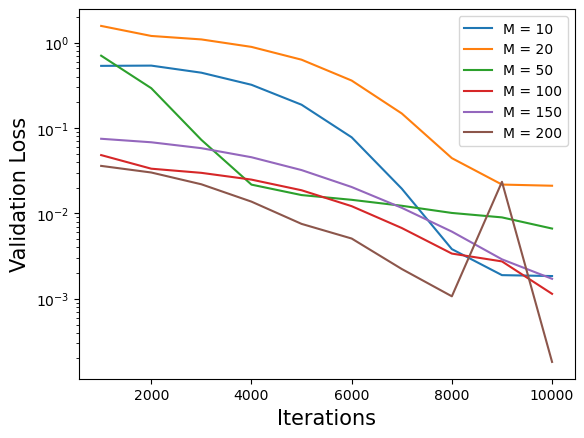

In [51]:
MM = [10, 20, 50, 100, 150, 200]

for i in MM:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'M = ' + str(i))
plt.yscale('log')
#plt.title('Validation Loss')
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Validation Loss', fontsize=15)
plt.legend()
plt.show()

Compiling model...
'compile' took 0.000329 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [3.80e+03, 1.48e+01]    [4.15e+03, 1.48e+01]    [1.21e+00]    
1000      [1.42e+01, 2.18e+00]    [9.15e+00, 2.18e+00]    [4.81e-01]    
2000      [2.91e+00, 8.87e-01]    [1.32e+00, 8.87e-01]    [2.87e-01]    
3000      [1.14e+00, 1.48e-01]    [6.81e-01, 1.48e-01]    [1.13e-01]    
4000      [7.21e-01, 8.53e-03]    [6.48e-01, 8.53e-03]    [2.78e-02]    
5000      [6.57e-01, 9.35e-04]    [6.67e-01, 9.35e-04]    [9.84e-03]    
6000      [6.07e-01, 1.09e-03]    [6.26e-01, 1.09e-03]    [1.05e-02]    
7000      [5.35e-01, 1.02e-03]    [5.53e-01, 1.02e-03]    [1.02e-02]    
8000      [4.38e-01, 7.77e-04]    [4.54e-01, 7.77e-04]    [8.94e-03]    
9000      [3.20e-01, 4.86e-04]    [3.33e-01, 4.86e-04]    [7.19e-03]    
10000     [2.04e-01, 2.15e-04]    [2.12e-01, 2.15e-04]    [4.98e-03]    
11000     [1.18e-01, 4.59e-05]    [1.20e-01, 4.59e-05]    [

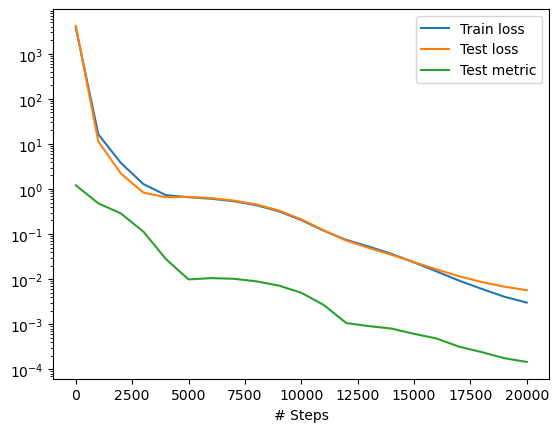

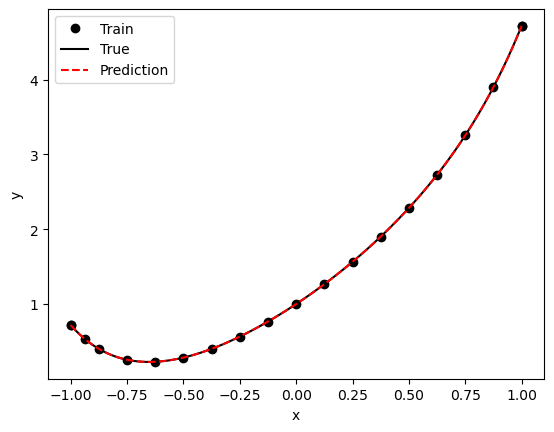

In [55]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 2*tf.exp(x**2) * (2*x**2 + 1)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return np.exp(x**2) + 2*x

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M = 20
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [47]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 2*tf.exp(x**2) * (2*x**2 + 1)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return np.exp(x**2) + 2*x

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M = 100
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"

rr = [2, 4, 6, 8, 10, 12]

for R in rr:
    ll = []
    
    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

    model = dde.Model(data, net)

    model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

    losshistory, train_state = model.train(iterations=10000)
    
    loss_test = losshistory.loss_test
    epochs[R] = losshistory.steps
    metric[R] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[R] = ll

Compiling model...
'compile' took 0.000354 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [7.71e+01, 1.10e+01]    [5.45e+01, 1.10e+01]    [8.47e-01]    
1000      [6.07e+00, 1.35e-01]    [2.36e+00, 1.35e-01]    [1.85e-01]    
2000      [2.24e+00, 1.04e-03]    [1.53e+00, 1.04e-03]    [3.36e-02]    
3000      [2.21e+00, 6.76e-05]    [1.65e+00, 6.76e-05]    [2.85e-02]    
4000      [2.19e+00, 6.08e-05]    [1.63e+00, 6.08e-05]    [2.84e-02]    
5000      [2.15e+00, 5.65e-05]    [1.61e+00, 5.65e-05]    [2.81e-02]    
6000      [2.09e+00, 5.23e-05]    [1.56e+00, 5.23e-05]    [2.77e-02]    
7000      [2.00e+00, 4.77e-05]    [1.49e+00, 4.77e-05]    [2.70e-02]    
8000      [1.86e+00, 4.16e-05]    [1.38e+00, 4.16e-05]    [2.60e-02]    
9000      [1.66e+00, 3.33e-05]    [1.23e+00, 3.33e-05]    [2.45e-02]    
10000     [1.41e+00, 2.41e-05]    [1.03e+00, 2.41e-05]    [2.24e-02]    

Best model at step 10000:
  train loss: 1.41e+00
  test loss: 1.03e+00
  test metric: [2.24e-02]

'train

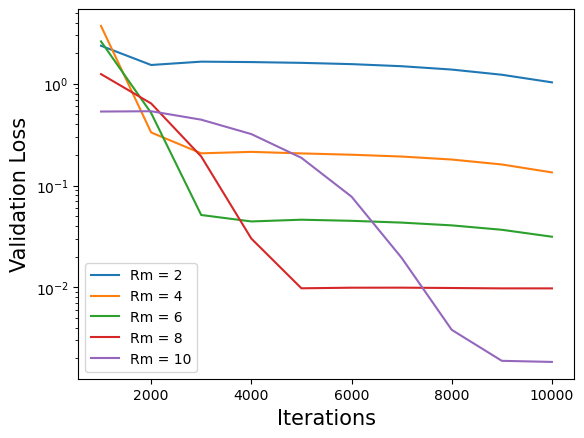

In [50]:
rr = [2, 4, 6, 8, 10]
for i in rr:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'Rm = ' + str(i))
plt.yscale('log')
#plt.title('Validation Loss')
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Validation Loss', fontsize=15)
plt.legend()
plt.show()

Compiling model...
'compile' took 0.000333 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.22e+03, 2.73e+00]    [1.05e+03, 2.73e+00]    [1.00e+00]    
1000      [3.85e+00, 5.76e-01]    [3.56e+00, 5.76e-01]    [3.63e-01]    
2000      [2.12e+00, 6.31e-02]    [2.64e+00, 6.31e-02]    [8.88e-02]    
3000      [1.81e+00, 9.60e-03]    [2.37e+00, 9.60e-03]    [2.88e-02]    
4000      [1.39e+00, 6.27e-03]    [1.82e+00, 6.27e-03]    [2.34e-02]    
5000      [9.01e-01, 4.30e-03]    [1.18e+00, 4.30e-03]    [1.95e-02]    
6000      [4.46e-01, 2.28e-03]    [5.91e-01, 2.28e-03]    [1.44e-02]    
7000      [1.50e-01, 7.62e-04]    [2.03e-01, 7.62e-04]    [8.74e-03]    
8000      [3.96e-02, 1.21e-04]    [5.36e-02, 1.21e-04]    [4.41e-03]    
9000      [2.04e-02, 7.69e-06]    [2.56e-02, 7.69e-06]    [2.98e-03]    
10000     [1.70e-02, 7.46e-07]    [2.21e-02, 7.46e-07]    [2.69e-03]    
11000     [1.41e-02, 3.68e-07]    [2.15e-02, 3.68e-07]    [

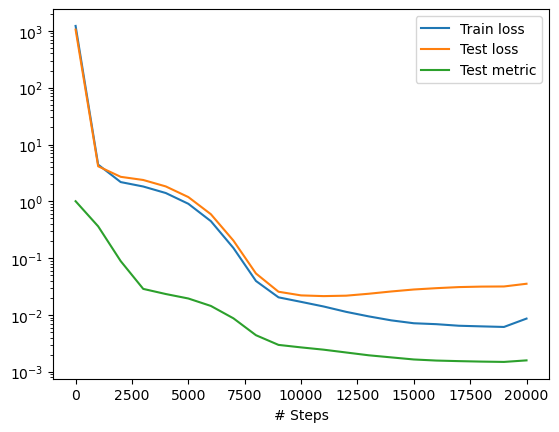

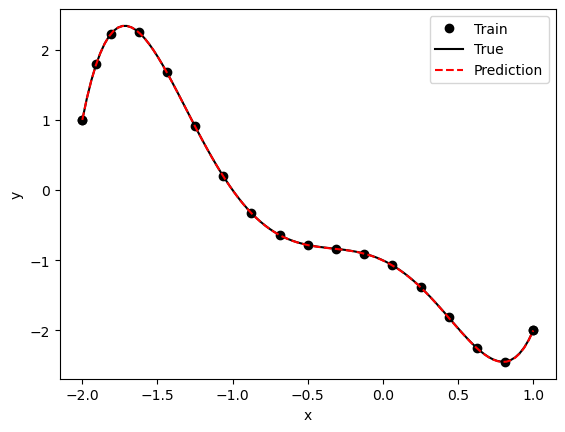

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 2*(10*x**3 + 12*x**2 - 3*x - 2)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return x**5 + 2*x**4 -x**3 - 2*x**2 - x - 1
geom = dde.geometry.Interval(-2, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

M = 50
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [5]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 2*(10*x**3 + 12*x**2 - 3*x - 2)

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return x**5 + 2*x**4 -x**3 - 2*x**2 - x - 1
geom = dde.geometry.Interval(-2, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

R = 10
MM = [5, 10, 20, 50, 100, 150, 200]
loss = {}
epochs = {}
metric = {}
for M in MM:
    ll = []
    layer_size = [1] + [M]  +  [1]

    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

    model = dde.Model(data, net)
    model.compile("adam", lr=0.001, metrics=["l2 relative error"])

    losshistory, train_state = model.train(iterations=10000)
    
    loss_test = losshistory.loss_test
    epochs[M] = losshistory.steps
    metric[M] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[M] = ll


M = 50
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"

rr = [2, 4, 6, 8, 10, 12]

for R in rr:
    ll = []
    
    net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

    model = dde.Model(data, net)

    model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

    losshistory, train_state = model.train(iterations=10000)
    
    loss_test = losshistory.loss_test
    epochs[R] = losshistory.steps
    metric[R] = losshistory.metrics_test
    for j in range(np.shape(loss_test)[0]):
        ll.append(loss_test[j][0])
    loss[R] = ll

Compiling model...
'compile' took 0.000424 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [2.91e+03, 8.27e+00]    [2.70e+03, 8.27e+00]    [1.52e+00]    
1000      [2.35e+02, 1.48e+00]    [1.55e+02, 1.48e+00]    [9.02e-01]    
2000      [1.93e+02, 1.82e-01]    [1.21e+02, 1.82e-01]    [6.77e-01]    
3000      [1.79e+02, 4.96e-02]    [1.12e+02, 4.96e-02]    [6.98e-01]    
4000      [1.70e+02, 6.20e-01]    [1.07e+02, 6.20e-01]    [8.95e-01]    
5000      [1.64e+02, 1.63e+00]    [1.05e+02, 1.63e+00]    [1.14e+00]    
6000      [1.61e+02, 2.78e+00]    [1.04e+02, 2.78e+00]    [1.36e+00]    
7000      [1.59e+02, 3.69e+00]    [1.05e+02, 3.69e+00]    [1.51e+00]    
8000      [1.59e+02, 4.14e+00]    [1.05e+02, 4.14e+00]    [1.58e+00]    
9000      [1.59e+02, 4.24e+00]    [1.05e+02, 4.24e+00]    [1.59e+00]    
10000     [1.59e+02, 4.25e+00]    [1.05e+02, 4.25e+00]    [1.60e+00]    

Best model at step 9000:
  train loss: 1.63e+02
  test loss: 1.09e+02
  test metric: [1.59e+00]

'train'

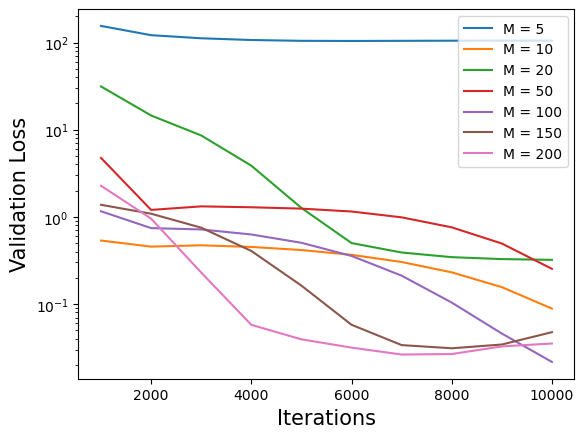

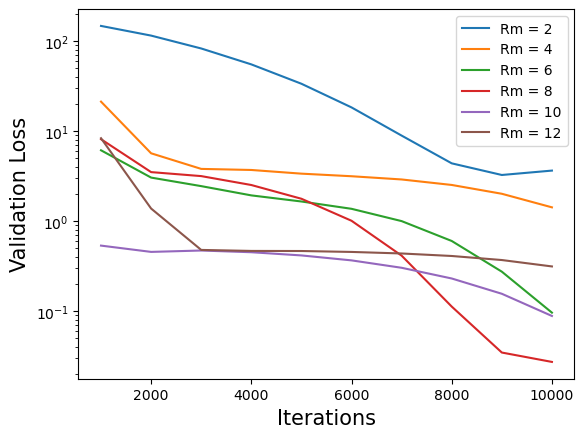

In [6]:
for i in MM:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'M = ' + str(i))
plt.yscale('log')
#plt.title('Validation Loss')
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Validation Loss', fontsize=15)
plt.legend()
plt.show()

for i in rr:
    plt.plot(epochs[i][1:], loss[i][1:], label = 'Rm = ' + str(i))
plt.yscale('log')
#plt.title('Validation Loss')
plt.xlabel('Iterations', fontsize=15)
plt.ylabel('Validation Loss', fontsize=15)
plt.legend()
plt.show()

Compiling model...
'compile' took 0.000698 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [2.05e+03, 4.09e+00]    [2.11e+03, 4.09e+00]    [9.98e-01]    
1000      [2.59e+01, 8.97e-01]    [2.61e+01, 8.97e-01]    [4.02e-01]    
2000      [8.68e+00, 3.31e-02]    [3.97e+01, 3.31e-02]    [2.94e-01]    
3000      [4.06e+00, 9.00e-03]    [2.55e+01, 9.00e-03]    [1.63e-01]    
4000      [1.20e+00, 2.35e-03]    [1.37e+01, 2.35e-03]    [6.11e-02]    
5000      [2.66e-01, 2.92e-04]    [7.91e+00, 2.92e-04]    [4.49e-02]    
6000      [1.47e-01, 1.45e-05]    [6.12e+00, 1.45e-05]    [6.18e-02]    
7000      [1.41e-01, 1.71e-06]    [5.86e+00, 1.71e-06]    [6.47e-02]    
8000      [1.36e-01, 1.33e-06]    [5.87e+00, 1.33e-06]    [6.34e-02]    
9000      [1.29e-01, 1.22e-06]    [5.82e+00, 1.22e-06]    [6.15e-02]    
10000     [1.20e-01, 1.04e-06]    [5.63e+00, 1.04e-06]    [5.91e-02]    

Best model at step 10000:
  train loss: 1.20e-01
  test lo

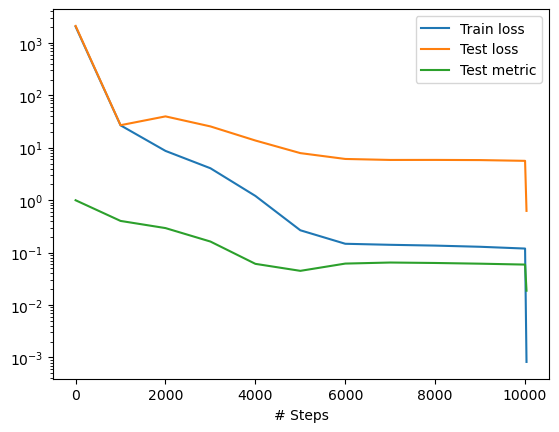

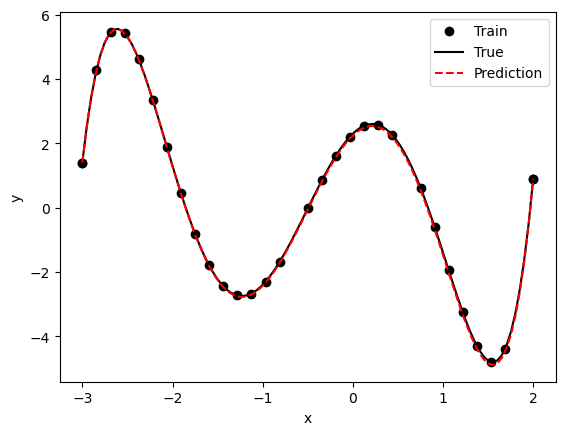

In [6]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 28, 2, solution=func, num_test=100)

M = 100
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 10
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=10000)
model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)
losshistory, train_state = model.train(iterations=10000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
'compile' took 0.000427 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [1.22e+03, 2.20e+01]    [1.10e+03, 2.20e+01]    [1.11e+00]    
1000      [9.25e+01, 7.39e+00]    [5.26e+01, 7.39e+00]    [5.64e-01]    
2000      [3.75e+01, 2.91e+00]    [2.28e+01, 2.91e+00]    [4.47e-01]    
3000      [1.21e+01, 9.60e-01]    [9.60e+00, 9.60e-01]    [3.29e-01]    
4000      [5.25e+00, 2.77e-01]    [7.84e+00, 2.77e-01]    [2.56e-01]    
5000      [3.45e+00, 9.56e-02]    [9.28e+00, 9.56e-02]    [2.19e-01]    
6000      [2.49e+00, 4.84e-02]    [1.05e+01, 4.84e-02]    [1.96e-01]    
7000      [1.86e+00, 3.81e-02]    [9.85e+00, 3.81e-02]    [1.79e-01]    
8000      [1.46e+00, 4.01e-02]    [8.25e+00, 4.01e-02]    [1.67e-01]    
9000      [1.25e+00, 4.45e-02]    [6.95e+00, 4.45e-02]    [1.59e-01]    
10000     [1.15e+00, 4.82e-02]    [6.21e+00, 4.82e-02]    [1.56e-01]    
11000     [1.10e+00, 5.10e-02]    [5.83e+00, 5.10e-02]    [1.54e-01]    
12000     [1.08e+00, 5.26e-02]  

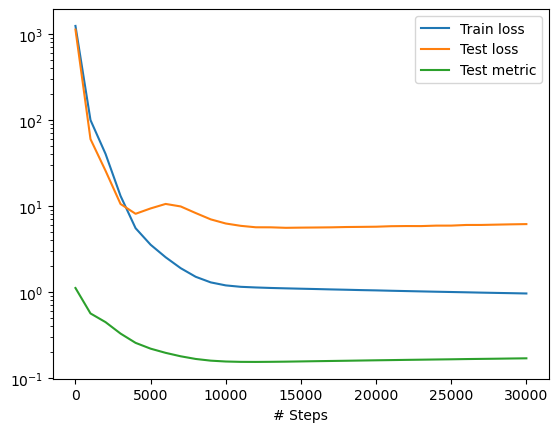

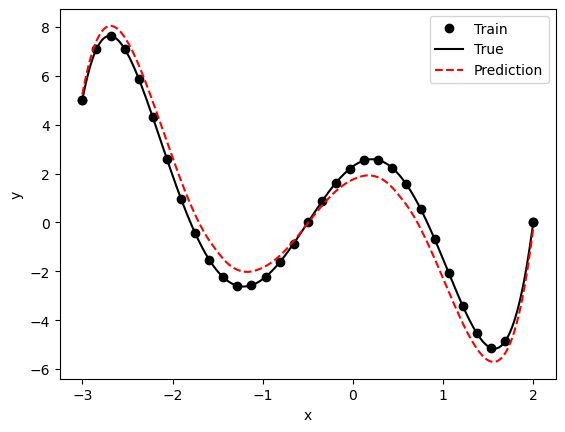

In [8]:
npart = 3
pi = np.pi

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 9.714*x**3 + 15.486*x**2 - 16.3572*x - 10.988

def boundary(x, on_boundary, npart=npart):
    return on_boundary

def func(x):
    return 0.4857*x**5 + 1.2905*x**4 - 2.7262*x**3 - 5.4940*x**2 + 2.6512*x + 2.2929

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary, npart=npart)
data = dde.data.PDE(geom, pde, bc, 30, 2, solution=func, num_test=500)

M = 100
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 4
ind = dde.nn.pou_indicators(geom, npart)

net = dde.nn.partition_random_FNN(layer_size, activation, initializer, npart, ind, Rm=R, b=R/10)

model = dde.Model(data, net)

model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=30000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [12]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

def max(l):
    maxx = 1e9
    for i in range(np.shape(l)[0]):
        if maxx > l[i][0]:
            maxx = l[i][0]
    return maxx

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 36, 2, solution=func, num_test=100)

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"

MM = [25, 50, 100, 150, 200, 250]
rr = [2, 4, 6, 8, 10]
loss = {}
for M in MM:
    for R in rr:
        key = str(M) + ' ' + str(R)
        layer_size = [1] + [M]  +  [1]
        
        net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

        model = dde.Model(data, net)

        model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

        losshistory, train_state = model.train(iterations=50000)
        loss[key] = max(losshistory.loss_test)

Compiling model...
'compile' took 0.000417 s



Training model...

Step      Train loss              Test loss               Test metric   
0         [1.16e+03, 3.45e+00]    [7.98e+02, 3.45e+00]    [1.18e+00]    
1000      [8.77e+02, 3.93e+01]    [5.90e+02, 3.93e+01]    [6.56e-01]    
2000      [7.16e+02, 8.34e+01]    [4.78e+02, 8.34e+01]    [8.42e-01]    
3000      [6.22e+02, 9.21e+01]    [4.11e+02, 9.21e+01]    [9.48e-01]    
4000      [5.51e+02, 8.48e+01]    [3.61e+02, 8.48e+01]    [9.29e-01]    
5000      [4.91e+02, 7.46e+01]    [3.18e+02, 7.46e+01]    [8.88e-01]    
6000      [4.40e+02, 6.40e+01]    [2.82e+02, 6.40e+01]    [8.44e-01]    
7000      [3.97e+02, 5.39e+01]    [2.52e+02, 5.39e+01]    [8.00e-01]    
8000      [3.60e+02, 4.46e+01]    [2.27e+02, 4.46e+01]    [7.56e-01]    
9000      [3.30e+02, 3.63e+01]    [2.06e+02, 3.63e+01]    [7.17e-01]    
10000     [3.03e+02, 2.92e+01]    [1.89e+02, 2.92e+01]    [6.83e-01]    
11000     [2.81e+02, 2.34e+01]    [1.74e+02, 2.34e+01]    [6.54e-01]    
12000     [2.60e+02, 1.88e+01]  

In [13]:
print(loss)

{'25 2': 38.212822, '25 4': 0.27592942, '25 6': 0.020324735, '25 8': 0.12047852, '25 10': 4.8404803, '50 2': 0.6928041, '50 4': 0.0062939967, '50 6': 0.026252165, '50 8': 0.013022614, '50 10': 0.007686212, '100 2': 0.060452852, '100 4': 0.0016396723, '100 6': 0.0055570174, '100 8': 0.026022783, '100 10': 0.009599123, '150 2': 0.027577342, '150 4': 0.0021816727, '150 6': 0.01280894, '150 8': 0.022681942, '150 10': 0.010946665, '200 2': 0.010990427, '200 4': 0.0018626711, '200 6': 0.0017761457, '200 8': 0.021997815, '200 10': 0.011450732, '250 2': 0.01260454, '250 4': 0.0020475264, '250 6': 0.0014544437, '250 8': 0.020922748, '250 10': 0.012813782}


In [21]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

def max(l):
    maxx = 1e9
    for i in range(np.shape(l)[0]):
        if maxx > l[i][0]:
            maxx = l[i][0]
    return maxx

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 36, 2, solution=func, num_test=100)

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"

MM = [25, 50, 100, 150, 200, 250]
rr = [2, 4, 6, 8, 10]
loss = {}
for M in MM:
    for R in rr:
        key = str(M) + ' ' + str(R)
        layer_size = [1] + [M]  +  [1]
        
        net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

        model = dde.Model(data, net)

        model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

        losshistory, train_state = model.train(iterations=30000)
        key = key + ', ' + str(losshistory.steps[-1])
        loss[key] = losshistory.loss_test[-1]

Compiling model...
'compile' took 0.000556 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.24e+03, 1.67e+00]    [8.67e+02, 1.67e+00]    [1.05e+00]    
17        [1.90e-02, 5.86e-10]    [1.82e-02, 5.86e-10]    [5.76e-03]    

Best model at step 17:
  train loss: 1.90e-02
  test loss: 1.82e-02
  test metric: [5.76e-03]

'train' took 2.103984 s

Compiling model...
'compile' took 0.000234 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.47e+03, 3.46e+00]    [9.91e+02, 3.46e+00]    [9.96e-01]    
22        [7.35e-03, 1.58e-10]    [8.58e-03, 1.58e-10]    [5.01e-03]    

Best model at step 22:
  train loss: 7.35e-03
  test loss: 8.58e-03
  test metric: [5.01e-03]

'train' took 2.626829 s

Compiling model...
'compile' took 0.000240 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [2.08e+03, 4.82e+00]    [1.35e+03, 4.82e+0

In [22]:
print(loss)

{'25 2, 17': array([1.8203802e-02, 5.8577143e-10], dtype=float32), '25 4, 22': array([8.5770860e-03, 1.5830892e-10], dtype=float32), '25 6, 22': array([9.9593727e-04, 5.3724136e-11], dtype=float32), '25 8, 22': array([5.362238e-02, 2.824466e-07], dtype=float32), '25 10, 25': array([5.4678404e-01, 7.1861456e-07], dtype=float32), '50 2, 13': array([1.7946202e-02, 1.1114594e-09], dtype=float32), '50 4, 19': array([4.6190359e-03, 1.0030021e-09], dtype=float32), '50 6, 26': array([3.0218863e-03, 5.2079940e-10], dtype=float32), '50 8, 25': array([1.07086964e-01, 3.10532528e-07], dtype=float32), '50 10, 33': array([9.169350e-03, 9.784017e-09], dtype=float32), '100 2, 12': array([1.6760444e-02, 6.6620487e-11], dtype=float32), '100 4, 17': array([4.8554889e-03, 1.8435742e-10], dtype=float32), '100 6, 23': array([4.7989823e-03, 1.2250201e-09], dtype=float32), '100 8, 32': array([3.1043153e-04, 5.9774408e-12], dtype=float32), '100 10, 33': array([3.6652807e-02, 1.0936725e-07], dtype=float32), '15

In [3]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 36, 2, solution=func, num_test=100)

M = 50
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 4
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)

model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
'compile' took 0.000257 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Step      Train loss              Test loss               Test metric   
0         [1.23e+03, 2.36e+01]    [8.50e+02, 2.36e+01]    [1.70e+00]    


KeyboardInterrupt: 

In [18]:
print(losshistory.loss_test[-1][0])
print(losshistory.steps[-1])

[5.7871047e-02 4.1919844e-07]
1313


In [19]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 36, 2, solution=func, num_test=100)
MM = [25, 50, 100, 150, 200, 250]
activation = ["random_sin", 'linear']
initializer = "Glorot uniform"
loss = {}
for M in MM:
    layer_size = [1] + [M]  +  [1]
    net = dde.nn.FNN(layer_size, activation, initializer)

    model = dde.Model(data, net)

    model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

    losshistory, train_state = model.train(iterations=50000)
    key = str(M) + ', ' + str(losshistory.steps[-1])
    loss[key] = losshistory.loss_test[-1]

Compiling model...
'compile' took 0.000450 s

Training model...

Step      Train loss              Test loss               Test metric   


c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


0         [1.23e+03, 2.02e+01]    [8.52e+02, 2.02e+01]    [1.65e+00]    
904       [2.82e-01, 3.12e-06]    [2.44e-01, 3.12e-06]    [1.51e-02]    

Best model at step 904:
  train loss: 2.82e-01
  test loss: 2.44e-01
  test metric: [1.51e-02]

'train' took 92.571577 s

Compiling model...
'compile' took 0.000282 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.23e+03, 3.19e+01]    [8.51e+02, 3.19e+01]    [1.86e+00]    
1313      [6.47e-02, 4.19e-07]    [5.79e-02, 4.19e-07]    [7.47e-03]    

Best model at step 1313:
  train loss: 6.47e-02
  test loss: 5.79e-02
  test metric: [7.47e-03]

'train' took 155.921832 s

Compiling model...
'compile' took 0.000241 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.22e+03, 2.90e+01]    [8.47e+02, 2.90e+01]    [1.79e+00]    
1494      [1.10e-02, 2.29e-07]    [8.75e-03, 2.29e-07]    [4.00e-03]    

Best model at step 1494:
  train loss

In [20]:
print(loss)

{'25, 904': array([2.4384548e-01, 3.1183586e-06], dtype=float32), '50, 1313': array([5.7871047e-02, 4.1919844e-07], dtype=float32), '100, 1494': array([8.7472685e-03, 2.2880118e-07], dtype=float32), '150, 814': array([1.3053408e-01, 6.0392194e-05], dtype=float32), '200, 1284': array([5.9859887e-02, 4.0583978e-07], dtype=float32), '250, 8': array([836.3552  ,   5.242422], dtype=float32)}


In [15]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

def max(l):
    maxx = 1e9
    for i in range(np.shape(l)[0]):
        if maxx > l[i][0]:
            maxx = l[i][0]
    return maxx

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 36, 2, solution=func, num_test=100)

activation = ["sin", 'linear']

initializer = "Glorot uniform"

MM = [25, 50, 100, 150, 200, 250]
pinn_loss = {}
for M in MM:
    key = str(M)
    layer_size = [1] + [M]  +  [1]
    
    net = dde.nn.FNN(layer_size, activation, initializer)

    model = dde.Model(data, net)

    model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

    losshistory, train_state = model.train(iterations=50000)
    pinn_loss[key] = max(losshistory.loss_test)

Compiling model...
'compile' took 0.000382 s

Training model...

0         [1.24e+03, 3.37e+01]    [8.62e+02, 3.37e+01]    [1.94e+00]    
1000      [1.13e+03, 1.41e+00]    [7.79e+02, 1.41e+00]    [1.20e+00]    
2000      [1.08e+03, 9.01e-01]    [7.47e+02, 9.01e-01]    [1.47e+00]    
3000      [1.04e+03, 5.83e-01]    [7.25e+02, 5.83e-01]    [1.70e+00]    
4000      [1.01e+03, 3.91e-01]    [7.07e+02, 3.91e-01]    [1.90e+00]    
5000      [9.86e+02, 2.70e-01]    [6.92e+02, 2.70e-01]    [2.08e+00]    
6000      [9.64e+02, 1.91e-01]    [6.80e+02, 1.91e-01]    [2.23e+00]    
7000      [9.45e+02, 1.37e-01]    [6.70e+02, 1.37e-01]    [2.37e+00]    
8000      [9.28e+02, 1.08e-01]    [6.62e+02, 1.08e-01]    [2.49e+00]    
9000      [9.13e+02, 7.62e-02]    [6.54e+02, 7.62e-02]    [2.59e+00]    
10000     [9.00e+02, 6.01e-02]    [6.48e+02, 6.01e-02]    [2.68e+00]    
11000     [8.88e+02, 4.40e-02]    [6.42e+02, 4.40e-02]    [2.76e+00]    
12000     [8.77e+02, 3.31e-02]    [6.37e+02, 3.31e-02]    [

In [16]:
print(pinn_loss)

{'25': 582.6803, '50': 571.85986, '100': 568.568, '150': 567.15454, '200': 566.1172, '250': 565.36035}


In [2]:
import pickle

f = open('loss.pkl', 'rb')
loss = pickle.load(f)
print(loss)

{'25 1': 1.31640625, '25 2': 0.06027420610189438, '25 4': 0.03549285978078842, '25 6': 0.026676099747419357, '25 8': 0.007766893599182367, '25 10': 0.013406689278781414, '50 1': 0.9480851888656616, '50 2': 0.043830253183841705, '50 4': 0.008003082126379013, '50 6': 0.008279556408524513, '50 8': 0.005837945267558098, '50 10': 0.0018921548034995794, '100 1': 0.18491393327713013, '100 2': 0.029521625488996506, '100 4': 0.0072364830411970615, '100 6': 0.009003298357129097, '100 8': 0.006265296600759029, '100 10': 0.00274291867390275, '150 1': 0.10567769408226013, '150 2': 0.032497234642505646, '150 4': 0.006473940331488848, '150 6': 0.005749864503741264, '150 8': 0.006351699121296406, '150 10': 0.00260943453758955, '200 1': 0.09291677922010422, '200 2': 0.030493583530187607, '200 4': 0.0067505319602787495, '200 6': 0.0037745805457234383, '200 8': 0.008187397383153439, '200 10': 0.0029405071400105953, '250 1': 0.09232547879219055, '250 2': 0.03420785441994667, '250 4': 0.007733530830591917,

Compiling model...
'compile' took 0.000772 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [1.30e+03, 1.77e+00]    [1.05e+03, 1.77e+00]    [1.01e+00]    
23        [2.59e-03, 5.39e-10]    [2.36e-03, 5.39e-10]    [1.75e-04]    

Best model at step 23:
  train loss: 2.59e-03
  test loss: 2.36e-03
  test metric: [1.75e-04]

'train' took 4.395424 s

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


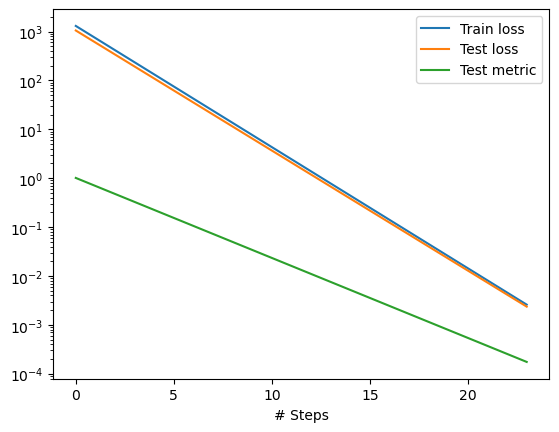

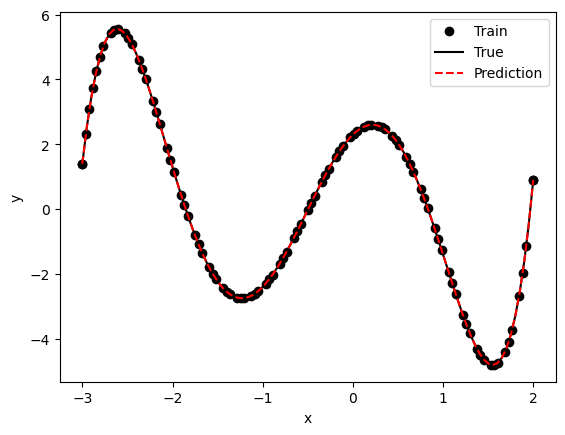

[2.3615367e-03 5.3856475e-10]


In [7]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx + 10*x**3 + 15.6*x**2 - 16.2*x - 11

def boundary(x, on_boundary, npart=1):
    return on_boundary

def func(x):
    return 0.5*x**5 + 1.3*x**4 - 2.7*x**3 - 5.5*x**2 + 2.7*x + 2.3

geom = dde.geometry.Interval(-3, 2)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 46, 2, solution=func, num_test=100)

M = 600
layer_size = [1] + [M]  +  [1]

activation = ["random_sin", 'linear']

initializer = "Glorot uniform"
R = 6
net = dde.nn.random_FNN(layer_size, activation, initializer, Rm=R, b=R)

model = dde.Model(data, net)

#model.compile("adam", lr=0.001, metrics=["l2 relative error"], loss_weights=1)
model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"], loss_weights=1)

losshistory, train_state = model.train(iterations=50000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)
print(losshistory.loss_test[-1])